# Fish weight prediction using linear and polynomial regression
## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the dataset

In [2]:
df=pd.read_csv("Dataset\Dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ROG\AppData\Local\Temp\ipykernel_2264\378490653.py:1: SyntaxWarning: invalid escape sequence '\D'
  df=pd.read_csv("Dataset\Dataset.csv")


In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.shape

(159, 7)

In [5]:
## Customizing the data for our usage
df=df[["Length1","Length2","Length3","Height","Width","Weight"]]

In [6]:
df.shape

(159, 6)

In [7]:
df.tail()

,Length1,Length2,Length3,Height,Width,Weight
154,11.5,12.2,13.4,2.0904,1.3936,12.2
155,11.7,12.4,13.5,2.4300,1.2690,13.4
156,12.1,13.0,13.8,2.2770,1.2558,12.2
157,13.2,14.3,15.2,2.8728,2.0672,19.7
158,13.8,15.0,16.2,2.9322,1.8792,19.9


In [25]:
df.describe()

,Length1,Length2,Length3,Height,Width,Weight
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,26.247170,28.415723,31.227044,8.970994,4.417486,398.326415
std,9.996441,10.716328,11.610246,4.286208,1.685804,357.978317
min,7.500000,8.400000,8.800000,1.728400,1.047600,0.000000
25%,19.050000,21.000000,23.150000,5.944800,3.385650,120.000000
50%,25.200000,27.300000,29.400000,7.786000,4.248500,273.000000
75%,32.700000,35.500000,39.650000,12.365900,5.584500,650.000000
max,59.000000,63.400000,68.000000,18.957000,8.142000,1650.000000


## Checking for null values

In [26]:
df.isnull().sum()

Length1    0
Length2    0
Length3    0
Height     0
Width      0
Weight     0
dtype: int64

## Correlation

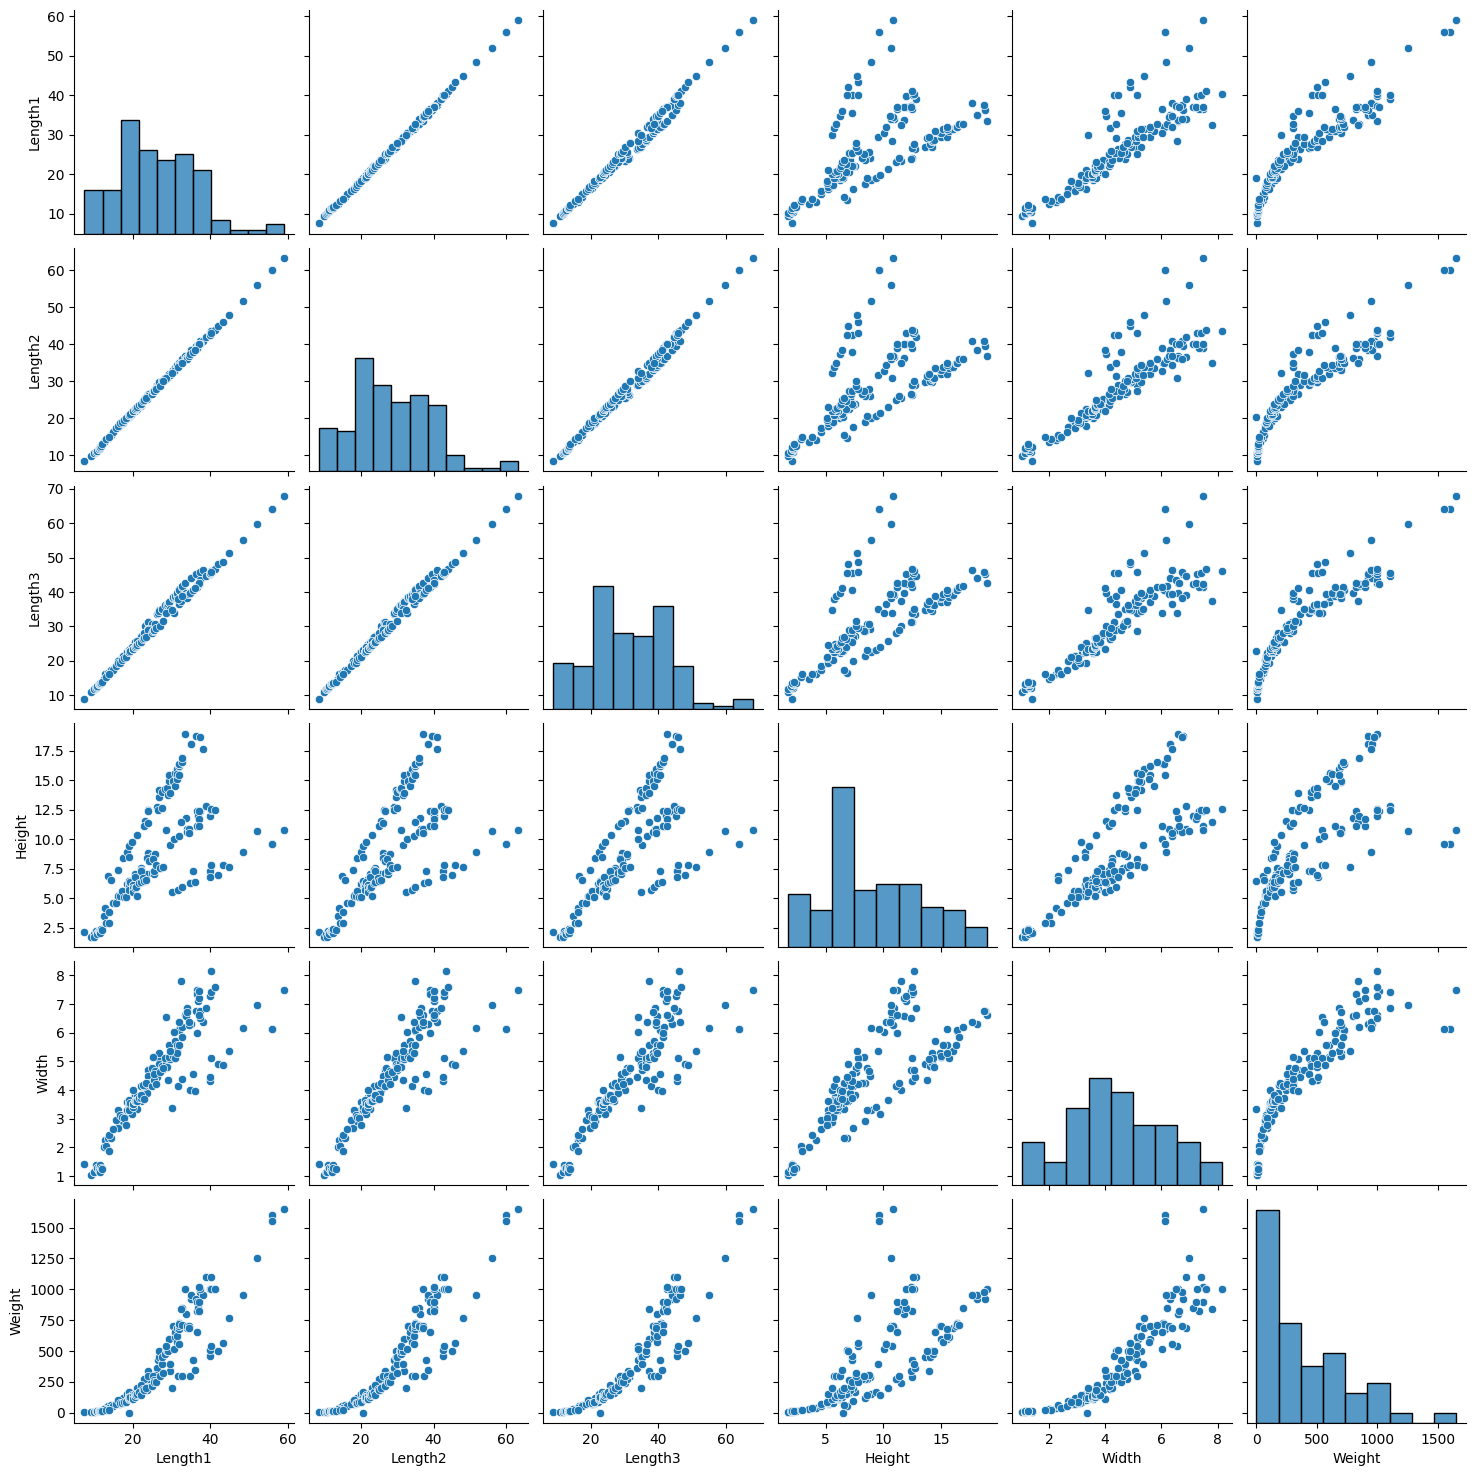

In [8]:
sns.pairplot(df)

In [9]:
df.corr()

,Length1,Length2,Length3,Height,Width,Weight
Length1,1.000000,0.999517,0.992031,0.625378,0.867050,0.915712
Length2,0.999517,1.000000,0.994103,0.640441,0.873547,0.918618
Length3,0.992031,0.994103,1.000000,0.703409,0.878520,0.923044
Height,0.625378,0.640441,0.703409,1.000000,0.792881,0.724345
Width,0.867050,0.873547,0.878520,0.792881,1.000000,0.886507
Weight,0.915712,0.918618,0.923044,0.724345,0.886507,1.000000


## Seperating dependent and Independent Variables

In [10]:
X=df[["Length1","Length2","Length3","Height","Width"]]
Y=df["Weight"]

## Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.2,random_state=42)

## Standardization

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_Train)
X_test=scaler.transform(X_Test)

## Fitting Linear regression Model

In [13]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,Y_Train)

LinearRegression()

In [14]:
y_pred=regression.predict(X_test)

## Performance Metrics for Linear Regression Model

In [15]:
## Performance metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(Y_Test,y_pred)
mae=mean_absolute_error(Y_Test,y_pred)
rmse=np.sqrt(mse)
print("Mean Square Error of the model is:",mse)
print("Mean Absolute Error of the model is:",mae)
print("Root Mean Square Error of the model is:",rmse)

Mean Square Error of the model is: 16763.88719314073
Mean Absolute Error of the model is: 103.90941708422301
Root Mean Square Error of the model is: 129.4754308474806


In [16]:
from sklearn.metrics import r2_score
r2score=r2_score(Y_Test,y_pred)
print("r2_score of the model is:",r2score)

r2_score of the model is: 0.8821430593048696


In [17]:
adjusted_r2_score=1-(1-r2score)*(len(Y_Test)-1)/(len(Y_Test)-X_Test.shape[1]-1)
print ("adjusted_r2_score of the model is:",adjusted_r2_score)

adjusted_r2_score of the model is: 0.8594782630173445


## Fitting the polynomial regression model

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_text_poly=poly.transform(X_test)

In [19]:
regression_2=LinearRegression()
regression_2.fit(X_train_poly,Y_Train)

LinearRegression()

In [20]:
ypred_2=regression_2.predict(X_text_poly)

## Performance Metrics for polynomial regression model

In [21]:
## Performance metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(Y_Test,ypred_2)
mae=mean_absolute_error(Y_Test,ypred_2)
rmse=np.sqrt(mse)
print("Mean Square Error of the model is:",mse)
print("Mean Absolute Error of the model is:",mae)
print("Root Mean Square Error of the model is:",rmse)

Mean Square Error of the model is: 4655.846662850152
Mean Absolute Error of the model is: 47.039756614595625
Root Mean Square Error of the model is: 68.23376482981246


In [22]:
from sklearn.metrics import r2_score
r2score_2=r2_score(Y_Test,ypred_2)
print("r2_score of the model is:",r2score_2)

r2_score of the model is: 0.9672675055786779


In [23]:
adjusted_r2_score_2=1-(1-r2score_2)*(len(Y_Test)-1)/(len(Y_Test)-X_Test.shape[1]-1)
print ("adjusted_r2_score of the model is:",adjusted_r2_score_2)

adjusted_r2_score of the model is: 0.960972795113039


## Prediction of new values

In [24]:
regression_2.predict(poly.transform(scaler.transform([[13.2,14.3,15.2,2.8728,2.0672]])))

d:\Important\Projects\Simple Linear Regression Project\lnreg\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([5.19446095])